In [1]:
reaction1 = ('k1', ['A'], ['B'])
reaction2 = ('k2', ['B'], ['C'])
reactions = [reaction1, reaction2]

In [2]:
rate_constants = {
    "k1": 0.2,
    "k2": 0.5,
}

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
from delayed_reactant_labeling.predict import DRL

time = np.linspace(0, 20, num=2000)
k1, k2 = rate_constants['k1'], rate_constants['k2']
A0 = 1

# examine these data points. unit of time here determines unit of time of rate constants.
drl = DRL(rate_constants=rate_constants, reactions=reactions, output_order=['A', 'B', 'C'], verbose=False)
result = solve_ivp(drl.calculate_step, t_span=[0, 20], y0=[A0, 0, 0], method='Radau', t_eval=time, jac=drl.calculate_jac)

C:\Users\mdingemans\AppData\Local\Temp\ipykernel_13152\337710542.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


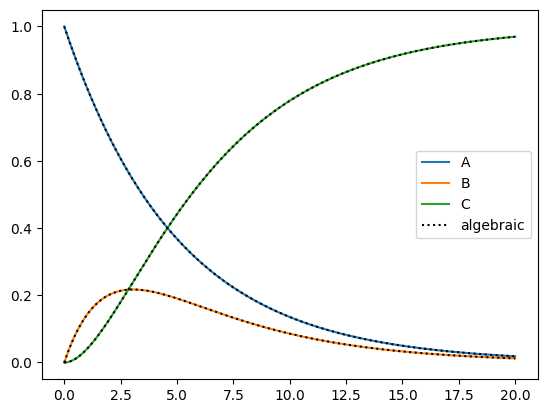

In [4]:
import matplotlib.pyplot as plt
kinetic_A = A0 * np.exp(-k1 * time)
kinetic_B = k1 / (k2 - k1) * A0 * (np.exp(-k1 * time) - np.exp(-k2 * time))
kinetic_C = A0 * (1 - np.exp(-k1 * time) - k1 / (k2 - k1) * (np.exp(-k1 * time) - np.exp(-k2 * time)))

fig, ax = plt.subplots()
ax.plot(time, result.y[0] / A0, label='A')
ax.plot(time, result.y[1] / A0, label='B')
ax.plot(time, result.y[2] / A0, label='C')
ax.plot(time, kinetic_A, color='k', linestyle=':', label='algebraic')
ax.plot(time, kinetic_B, color='k', linestyle=':')
ax.plot(time, kinetic_C, color='k', linestyle=':')
ax.legend()
fig.show()